<a href="https://colab.research.google.com/github/goflvhxj/ML-practice/blob/main/5%EC%9E%A5_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**1. 회귀 소개**

- 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 머신러닝 회귀 예측의 핵심은 주어진 피처(독립변수)와 결정 값 데이터 기반에서 학습을 통해 독립변수의 값에 영향을 미치는 최적의 회귀 계수를 찾아내는 것<br>
<br>

**독립변수의 개수**
- 1개 : 단일 회귀
- 여러개 : 다중 회귀
<br><br>

**회귀 계수의 결합**
- 선형 : 선형 회귀
- 비선형 : 비선형 회귀

<br>

**선형 회귀**
- 여러 가지 회귀 중 가장 많이 사용됨
- 실제 값과 예측값의 차이(오류의 제곱값)를 최소화하는 직선형 회귀선을 최적화하는 방식
- 규제(Regularization) 방법에 따라 별도의 유형으로 나뉠 수 있다.
  - 규제 : 일반적인 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 페널티 값을 적용하는 것
- 대표적 모델
  1. **일반선형회귀** : 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화, 규제를 적용하지 않은 모델
  2. **릿지(Ridge)** : 선형 회귀에 L2 규제 추가, L2규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만듦
  3. **라쏘(Lasso)** : 선형 회귀에 L1 규제 추가, L1규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 함
  4. **엘라스틱넷(ElasticNet)** : L2, L1 규제를 동시에 적용하여 L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정
  5. **로지스틱 회귀(Logistic Regression)** : 분류에 이용되는 선형 모델, 매우 강력한 분류 알고리즘으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능 보임

<br>

###**2. 단순 선형 회귀를 통한 회귀 이해**

단순 선형회귀는 독립변수, 종속변수가 각각 1개씩인 선형 회귀이다. x,y에 대한 1차 함수식을 기울기(W1)와 절편(W0)을 통해 나타내고 W1, W0를 회귀계수로 지칭한다.<br> 
<br>
**잔차 : 실제 값 - 회귀 모델 값**<br>
**최적의 회귀 모델**을 만든다 = 전체 데이터의 **잔차(오류 값) 합이 최소**가 되는 모델을 만든다 = **오류 값이 최소**가 되는 최적의 회귀 계수를 찾는다<br>
<br> 
RSS(Residual Sum of Square)
- 오류 값의 제곱을 구해서 더하는 방식
- 잔차의 합을 구할 때 잔차는 +, -가 둘다 존재하므로 그냥 더하면 오류 합이 크게 줄어들수 있음
- Error^2 = RSS
<br><br> 

회귀에서 RSS는 비용(cost)이며 w변수로 구성되는 RSS를 비용함수(손실함수)라 지칭한다. 회귀 알고리즘은 데이터를 계속 학습하며 비용 함수가 반환하는 값(오류값)을 지속해서 감소시키고 더 이상 감소하지 않는 최소의 오류 값을 구하는 것


<br>

###**3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

- 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공
- 오류가 작아지는 방향으로 W값을 보정하는 것
<br>
<br>

**Step 1** : w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산<br>
**Step 2** : w1을 w1+편미분 결과값으로 update, w0를 w0+편미분 결과값으로 update 후 다시 비용 함수의 값 계산<br>
**Step 3** : 비용 함수의 값이 감소했으면 다시 Step 2 반복, 감소하지 않으면 그때의 w1,w0값 구한 뒤 반복 중지

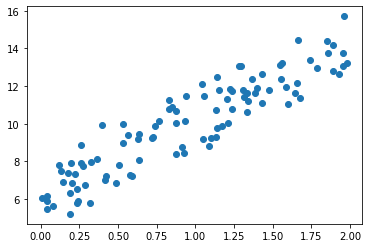

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4X + 6을 근사(w1 = 4, w0 = 6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100, 1) # [0,1)의 균일분포 난수를 배열 (100, 1)로 생성
y = 6 + 4 * X + np.random.randn(100, 1) # N(0,1)인 가우시안 표준 정규분포 난수를 배열 (100,1)로 생성

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


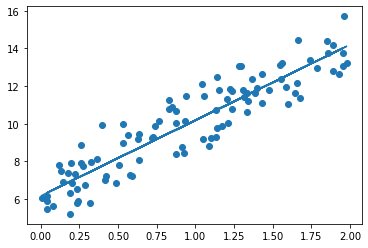

In [ ]:
# w1과 w0를 업데이트 할 w1_update, w0_update 반환
# w1_update : RSS(w0,w1)을 w1으로 편미분한 값
# w0_update : RSS(w0,w1)을 w0로 편미분한 값

def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
  N = len(y)

  # w1_update, w0_update를 w1, w0의 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  # y_pred 계산 후 예측과 실제 값 차이 계산 by 내적
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))

  # w1_update, w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(diff.T, w0_factors))

  return w1_update, w0_update

# w1과 w0 업데이트를 iters로 주어진 횟수만큼 반복

def gradient_descent_steps(X,y,iters=10000):
  # w0, w1 모두 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    #print(w1,w0)
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

plt.scatter(X,y)
plt.plot(X, y_pred)

경사 하강법을 이용해 회귀선(y_pred와 X로 만듦)이 잘 만들어졌음을 알 수 있다. 그러나 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸림.<br><br>

**확률적 경사 하강법**은 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해 빠른 속도를 보장함.

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters=1000):
  # w0, w1 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)

    # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0]) # random.permutation(X.shape[0]) : X.shape[0]는 전체 행개수이므로 전체 행의 인덱스가 무작위로 섞인 것
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]

    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print("Stochastic Gradient Descent Total Cost:{0:.4f}".format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w0, w1과 큰 차이가 없으며 예측 오류 비용 또한 경사 하강법으로 구한 예측 오류 비용보다 아주 조금 높음. 즉, 예측 성능상의 차이가 없음.<br>
따라서 큰 데이터를 처리할 경우에는 경사 하강법은 시간이 매우 오래걸리므로 확률적 경사 하강법을 이용한다.

<br>

###**4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

####**LinearRegrssion 클래스 - Ordinary Least Squares**
- RSS를 최소화해주는 OLS(Ordinary Least Squares, **LSE**, 최소제곱법) 추정 방식으로 구현한 클래스
- OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음. 다중공선성 주의
- **다중공선성** : 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감해지는 것. 이럴 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용. 또한 많은 피처들이 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 고려해야함


<br> 
####**LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**

In [ ]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head(3)


Boston 데이터 세트 크기 :  (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [ ]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


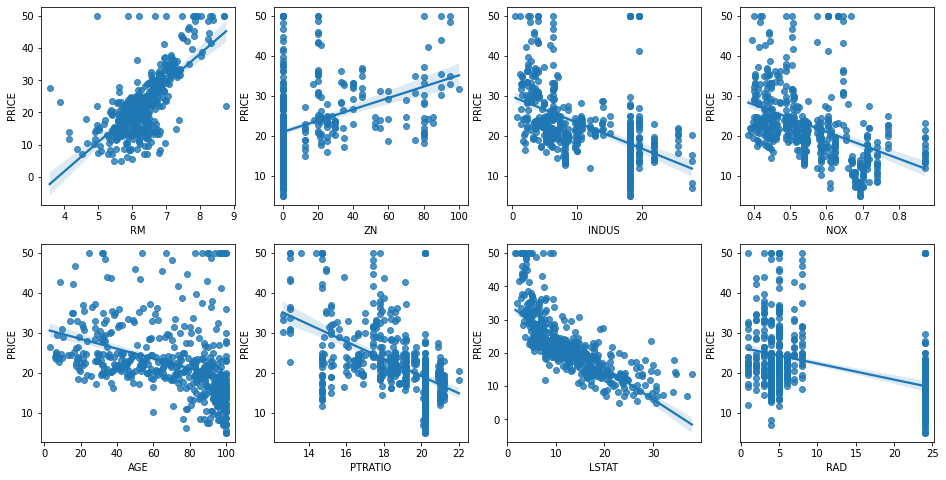

In [ ]:
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4

  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE',data=bostonDF, ax=axs[row][col])

산점도를 통해 RM과 LSTAT이 PRICE와의 상관성이 높은 것을 확인할 수 있음<BR>
LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델을 만들어 보고 이를 MSE와 R2 Score를 이용해 평가해 볼 것이다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


LinearRegression으로 생성한 주택가격 모델의 intercept와 coefficients(회귀 계수) 값을 확인

In [ ]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.99559517216477
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑 & 높은 순으로 출력

In [ ]:
# 회귀 계수를 큰 값 순으로 출력하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀계수가 가장 크며, NOX가 음의 값으로 회귀계수가 가장 크다. 이제 최적화를 통해 피처 coefficients(회귀 계수)의 변화를 살펴볼 것이다.

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2 ))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: ', np.round(avg_rmse, 3))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE:  5.829


cross_val_score()의 인자로 scoring='neg_mean_squared_error'를 지정하면 반환되는 수치 값은 음수값이다. 사이킷런의 지표 평가 기준은 높은 지표값일수록 좋은 모델인 데 반해 **회귀는 MSE 값이 낮을수록 좋은 회귀모델**이다. 사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해 scoring='neg_mean_squared_error'로 사이킷런의 scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환을 한다. 따라서 **원래 모델에서 계산된 MSE 값을 구하려면 반환된 값에 다시 -1을 곱해야 한다**.

<br> 

###**5. 다항회귀와 과(대)적합/과소적합 이해**

####**다항회귀이해**
- 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
- 다항회귀는 선형 회귀
  - 회귀에서 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관함
- 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음. but 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현

In [ ]:
# 단항값 [x1, x2]를 2차 다항값 [1,x1,x2,x1^2,x1x2,x2^2]으로 변환
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항 회귀 함수를 임의로 설정하고 회귀 계수 예측할 것이다. 3차 다항 회귀의 결정 함수식은 y = 1 + 2(x1) + 3(x1^2) + 4(x2^3) 으로 설정한다.

In [ ]:
# 3차 다항 회귀의 결정 함수식
def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


이제 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현된다.<br>
3차 다항 계수 : [1, x1, x2, x1^2, x1x2, x2^2, x1^3, x1^2x2, x1x2^2, x2^3]

In [ ]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


우리가 임의로 정한 3차 다항회귀 결정식의 회귀계수값인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]과 Polynomial 회귀계수 값을 비교해보면 차이는 있지만 다항 회귀로 근사하고 있음을 알 수 있다.

In [ ]:
# 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다 Pipeline객체를 이용해 한 번에 다항회귀 구현하는 것이 더 명료한 코드 작성
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀계수\n', np.round(model.named_steps['linear'].coef_, 2)) # pipeline의 단계 중 원하는 속성 고를 때 named_steps['속성'] 사용

Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


<br>

####**다항 회귀를 이용한 과소적합 및 과적합 이해**

다항 회귀는 직선적 관계가 아닌 복잡한 다항 관계를 모델링 할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하지만 차수를 높일수록 과적합의 문제가 크게 발생한다.<br><br>

다항회귀를 이용해 과소적합과 과적합의 문제를 잘 보여주는 예시이다. 피처 X와 target y가 잡음이 포함된 다항식의 코사인 그래프 관계를 가지도록 만든다. 그리고 이에 기반해 다항 회귀의 차수를 변화시키며 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제이다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
#print(X)

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1
#print(y)

이제 예측 결과를 비교할 다항식 차수를 1, 4, 15로 변경해가며 예측 결과를 비교할 것이다.


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232072 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898770e+05 -1.87415056e+06  2.03715126e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE는 180526263.3177066 입니다.


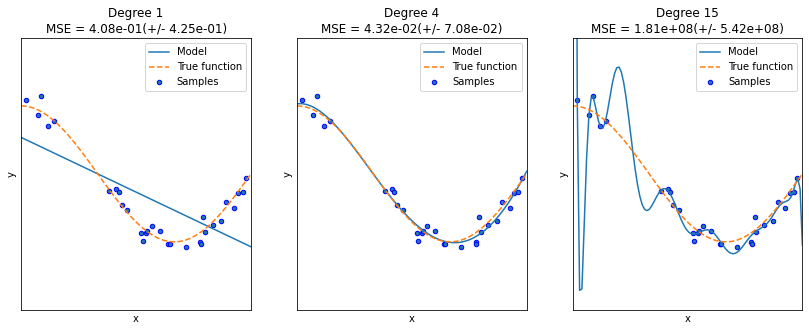

In [ ]:
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
  
  # pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선 그려 비교
  X_test = np.linspace(0, 1, 100)
  #print(X_test.shape) # (100,)

  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = "Model") # np.newaxis : 차원을 1개 늘려줌
  #print(X_test[:,np.newaxis].shape) # (100,1)
  
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label = 'True function')
  plt.scatter(X, y, edgecolor = 'b', s = 20, label = 'Samples')

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)),; plt.legend(loc='best')
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

위 그래프를 통해 **Degree 1**인 경우는 **과소적합**으로 모델이 너무 단순하여 실제 데이터 세트를 잘 반영하지 못하고 있다.<br> 
**Degree 4**는 실제 데이터 세트와 유사한 예측 곡선을 그리고 있다. MSE값도 가장 낮아 제일 **뛰어난 예측 성능**을 나타낸다.<br> 
**Degree 15**는 학습 데이터를 지나치게 반영한 결과로 **과적합**인 모델이고 실제 데이터 세트를 잘 반영하지 못하고 MSE 값이 터무니없이 높은 값이 출력되었다.

<br>

####**편향-분산 트레이드오프(Bias-Variance Trade off)**

- 고편향 : 실제 결과값으로부터 예측 결과가 멀리 떨어져 지나치게 한 방향성으로 치우친 모델<br>
- 고분산 : 예측값이 퍼져있는 높은 변동성을 가진 모델

<br> 
일반적으로 편향과 분산은 한쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 편향이 높으면 분산이 낮아지고(**과소적합**), 분산이 높으면 편향이 낮아진다(**과적합**). <br> 
편향이 너무 높으면 전체 오류가 높다. **편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아진다.**<br>
<br>
**편향을 낮추고 분산을 지속적으로 높이면서 전체 오류가 가장 낮아지는 '골디락스' 지점**을 통과하면서 분산을 지속적으로  높이면 전체 오류 값이 오히려 증가하며 예측 성능이 다시 저하된다.

<br>

###**6. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷**

####**규제 선형 모델의 개요**
비용(Cost) 함수 목표 = Min(RSS(W) + alpha * ||W||^2)
<br> 
alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터<br> 
- alpha = 0 (혹은 매우 작은 값) : 비용 함수 = Min(RSS(W)) 이므로 회귀 계수의 영향력이 거의 없음<br> 
- alpha = 무한대 : alpha * ||W||^2도 무한대가 되므로 W값을 0에 가깝게 최소화 시켜야함<br>

즉, alpha를 점점 증가시킬수록 회귀 계수의 크기를 감소시킬 수 있음
<br><br>
규제(Regularization) : 비용 함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식<br> 

- L1 규제 : alpha * ||W|| 와 같이 W의 절댓값에 대해 페널티를 부여함. 영향력이 크지 않은 W값을 0으로 변환. (**라쏘 회귀**)
- L2 규제 : alpha * ||W||^2 와 같이 W의 제곱에 대해 페널티를 부여함. (**릿지 회귀**)
<br>


<br> 
####**릿지 회귀**
<br> 
Ridge 클래스의 주요 생성 파라미터는 alpha이며, 이는 릿지 회귀의 alpha L2 규제 계수에 해당함.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds의 개별 평균 RMSE : ', np.round(avg_rmse, 3))

5 folds의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 개별 평균 RMSE :  5.518


앞에서 규제가 없이 LinearRegression으로 분석을 했던 것 보다 평균 RMSE가 더 낮아져 더 뛰어난 예측 성능을 보여줌.<BR> 
<br> 
이번엔 alpha를 0, 0.1, 1, 10, 100으로 변화시키며 RMSE와 회귀계수 값의 변화를 살펴볼 것이다.

In [ ]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge = Ridge(alpha)

  # cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


alpha가 커질수록 평균 RMSE가 점점 좋아지는 것을 확인할 수 있다.<br> 
이번에는 alpha 값에 따라 피처의 회귀 계수 값을 가로 막대 그래프로 시각화해 볼 것이다.

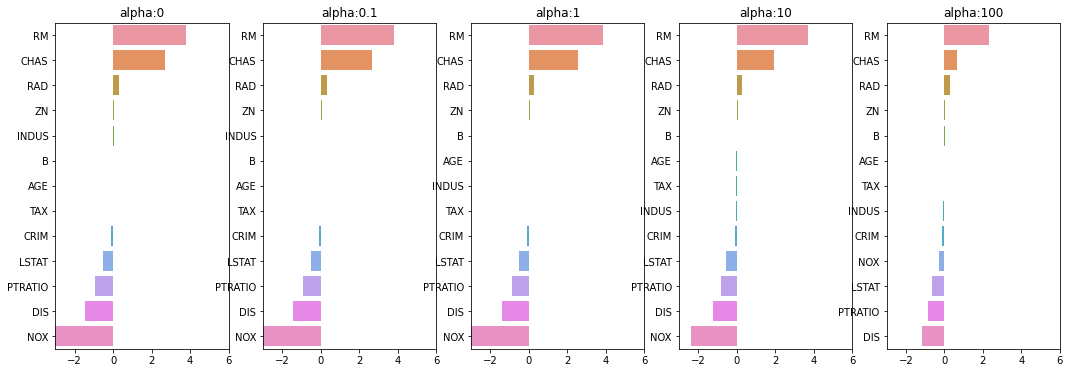

In [ ]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha)
  ridge.fit(X_data, y_target)

  # alpha에 따른 피처별로 회귀 계수를 Serires로 변환하고 이를 DataFrame의 칼럼으로 추가
  coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff

  # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending = False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x = coeff.values, y = coeff.index, ax=axs[pos])

# for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

alpha 값을 증가시킬수록 회귀 계수가 점점 작아지는 것을 확인할 수 있다.<br><br> 
이제 DataFrame에 저장된 alpha값의 변화에 따른 릿지 회귀 계수 값을 구해볼 것이다.

In [ ]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


alpha 값이 증가하면서 회귀 계수가 지속적으로 감소하고 있지만 릿지 회귀의 경우 회귀 계수를 0으로 만들지는 않는다.

<br> 
####**라쏘 회귀**
L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다. 이러한 측면에서 L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특징을 가진다.

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n = None, verbose = True, return_coeff = True):
  coeff_df = pd.DataFrame()
  if verbose : print('####### ', model_name, '#######')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha = param)
    elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))

    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data_n, y_target_n)
    if return_coeff:
      # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
      coeff = pd.Series(model.coef_, index = X_data_n.columns)
      colname = 'alpha:'+str(param)
      coeff_df[colname] = coeff

  return coeff_df


In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval()함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


alpha = 0.07일때 가장 좋은 평균 RMSE를 보여줌. 앞의 릿지 예측보다는 좀 떨어지지만 LinearRegression 때보다는 더 좋아진 결과를 볼 수 있음.

In [ ]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha의 크기가 커지면서 일부 피처들의 값이 0으로 바뀌고 있다. 이로 인해 회귀 계수가 0인 피처는 회귀 식에서 제외되어 피처 선택의 효과를 얻을 수 있다.

<br> 
####**엘라스틱넷 회귀**
엘라스틱넷 회귀 =  L2 규제 + L1 규제<br> 
비용함수의 목표 = RSS(W) + alpha2 * ||W||^2 + alpha1 * ||W|| 식을 최소화하는 W값을 찾는 것<br> <br> 
단점 : L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸림
<br><br>

ElasticNet 클래스의 l1_ratio 파라미터 값은 alpha1 / (alpha1 + alpha2), alpha1 = 0이면 L2 규제, alpha2이 0이면 L1 규제가 됨

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [ ]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


엘라스틱넷 회귀에서는 alpha = 0.5일 때 RMSE가 가장 낮아 제일 좋은 예측 성능을 보이고 회귀 계수도 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있다.

<BR> 
####**선형 회귀 모델을 위한 데이터 변환**
선형 모델은 일반적으로 피처와 타깃값 간에 선형의 관계가 있다고 가정하고, 최적의 선형함수를 찾아내 결과값을 예측한다. 또한 선형 회귀 모델은 피처값과 타깃값의 분포가 **정규분포** 형태를 굉장히 선호한다.<br><br> 

타깃값이 왜곡된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높고, 피처값 역시 타깃값보단 덜하지만 왜곡된 분포도일 경우 예측 성능에 부정적인 영향을 미칠 수 있다.<br> <br> 
따라서 **선형회귀 모델을 적용하기 전 먼저 데이터 스케일링 / 정규화 작업을 수행**한다. 그러나 이를 한다고 무조건 예측 성능이 향상 되는 것은 아니다.
<br> 
1. 표준 정규 분포 변환 (StandardScaler)
2. 최댓값 / 최솟값 정규화 (MinMaxScaler)
3. 로그 변환(np.log1p)

<br> 
**타깃값의 경우 일반적으로 로그 변환**을 적용한다. 결정 값을 다시 원본 타깃값으로 복원하기도 쉽고, 왜곡된 분포도 형태의 타깃값을 로그 변환하여 예측 성능이 향상된 사례가 검증되었기 때문에 타깃값의 경우는 로그변환 적용

In [ ]:
# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여하지 않음
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PolynomialFeatures

def get_scaled_data(method = 'None', p_degree = None, input_data = None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias = False).fit_transform(scaled_data)

  return scaled_data

In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규분포, 표준정규분포 + 다항식 특성, 최대최소, 최대최소 + 다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard',None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = X_data)
  print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False, return_coeff = False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.770

로그 변환을 진행했을 때 예측 성능이 제일 많이 개선된 것을 알 수 있다.

<br> 
###**7. 로지스틱 회귀**
- 로지스틱 회귀는 **선형 회귀 계열**로 회귀가 선형인가 비선형인가는 **가중치 변수가 선형인지 아닌지**를 따른다.
- 로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 **시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류 결정**
  - 시그모이드 함수 : S자 커브 형태로 y값이 항상 0에서 1사이 값을 반환함. x값이 커지면 1에 근사, x값이 작아지면 0에 근사하며 x = 0일 때 y = 0.5

<br>  
이제 위스콘신 유방암 데이터 세트를 이용해 로지스틱 회귀로 암 여부를 판단해 볼 것이다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

cancer = load_breast_cancer()

# StandardScaler로 평균이 0, 분산이 1인 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 roc_auc 측정
print('accuracy: {0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {0:.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터로 penalty와 C가 있다. penalty는 규제의 유형을 설정하며 기본은 'l2'이다. C는 규제 강도를 조절하는 1/alpha이다. C값이 작을 수록 규제 강도가 크다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'penalty':['l2', 'l1'],
          'C':[0.01, 0.1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

로지스틱 회귀는 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어나다. 또한 로지스틱 회귀는 희소한 데이터 세트 분류에도 뛰어난 성능을 보여서 텍스트 분류에서도 자주 사용된다.

<br><br> 
###**8. 회귀 트리**


In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state = 0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE: ', np.round(avg_rmse, 3))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE:  4.423


이번에는 랜덤 포레스트 뿐만 아니라 결정트리, GBM, XGBoost, LightGBM의 Regressor를 모두 이용해 보스턴 주택 가격 예측을 해볼 것이다.

In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print("#### ", model.__class__.__name__, ' ####')
  print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth=4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

####  DecisionTreeRegressor  ####
5 교차 검증의 평균 RMSE : 5.978
####  RandomForestRegressor  ####
5 교차 검증의 평균 RMSE : 4.423
####  GradientBoostingRegressor  ####
5 교차 검증의 평균 RMSE : 4.269
[00:10:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
####  XGBRegressor  ####
5 교차 검증의 평균 RMSE : 4.089
####  LGBMRegressor  ####
5 교차 검증의 평균 RMSE : 4.646


회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없지만 feature_importances_를 통해 피처별 중요도를 알 수 있다.

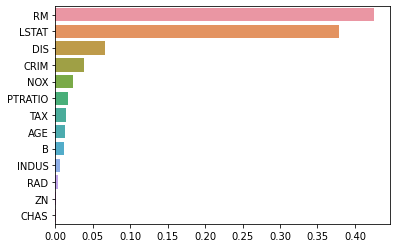

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

PRICE 와 가장 밀접한 관계를 가지는 칼럼이 RM이라는 것을 확인할 수 있음

(100, 2)


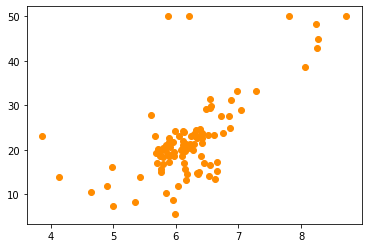

In [ ]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

보스턴 데이터 세트에 대해 LinearRegression과 DecisionTreeRegressor를 max_depth를 바꿔가며 학습해 볼 것이다. 이때 RM값을 4.5~8.5까지의 100개의 테스트 데이터 세트로 제공했을 때 예측 값을 구해볼 것이다.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

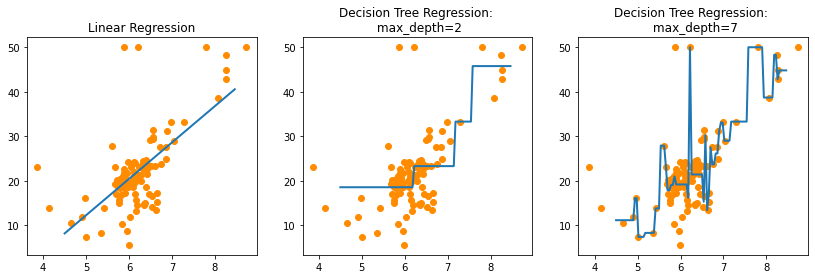

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축 값을 4.5~8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:2", linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)


<br> 
###**9. 회귀 실습 - 자전거 대여 수요 예측**


####**데이터 클렌징 및 가공**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('/content/drive/MyDrive/Jupyter/bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


전체 데이터에서 NULL 데이터는 없으며 datetime 칼럼만 object 형식이라 년, 월, 일, 시간으로 분리할 것이다.

In [ ]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [ ]:
# casual + registed = count 이므로 두 칼럼이 별로 쓸모 없고 count와 상관성이 높아 예측을 저해할 수 있으므로 삭제
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace = True)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE(Root Mean Square Log Error) 계산
def rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred) ** 2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

# 사이킷런의 mean_square_error()를 이용해 RMSE 계산
def rmse(y, pred):
  return np.sqrt(mean_squared_error(y, pred))

# MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
  rmsle_val = rmsle(y, pred)
  rmse_val = rmse(y, pred)
  # MAE는 사이킷런의 mean_absolute_error()로 계산
  mae_val = mean_absolute_error(y, pred)
  print('RMSLE:{0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val, rmse_val, mae_val))

<br>

####**로그 변환, 피처 인코딩과 모델 학습/예측/평가**

회귀 모델을 적용하기 전 결괏값이 정규 분포로 돼 있는지 확인해야 하고 카테고리형 회귀 모델의 경우 원-핫 인코딩으로 피처를 인코딩해야 함.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE:1.165, RMSE:140.900, MAE:105.924


In [ ]:
def get_top_error_data(y_test, pred, n_tops = 5):
  # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성
  result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
  result_df['predicted_count'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

  # 예측값과 실제 값이 가장 큰 데이터 순으로 출력
  print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


회귀에서 이렇게 큰 예측 오류가 발생할 경우 Target 값의 분포가 왜곡된 형태를 이루고 있는지 확인해봐야 한다. Target 값의 분포는 정규 분포 형태가 좋다.

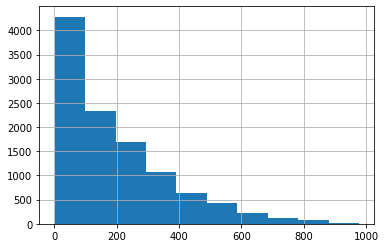

In [ ]:
y_target.hist()

정규 분포 형태가 아닌 0 ~ 200 사이에 왜곡돼 있는 형태이다. 왜곡된 값을 정규 분포 형태로 바꾸는 방법은 로그변환이다.(log1p)

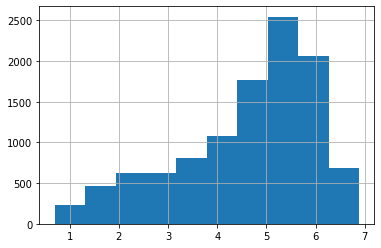

In [ ]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

변환 전보다는 왜곡 정도가 많이 향상되었다.

In [ ]:
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
# expm1 = exp(x) - 1, log(x) + 1을 해줬으므로 반대로 해주는 것
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE:1.017, RMSE:162.594, MAE:109.286


RMSLE는 조금 줄어들었지만 오히려 RMSE와 MAE는 더 늘어난 것을 알 수 있다. 각 피처의 회귀 계수 값을 시각화하여 이유를 확인해 본다.

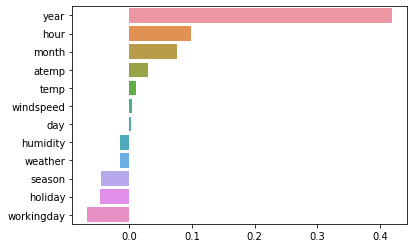

In [ ]:
coef = pd.Series(lr_reg.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

자전거 대여 횟수에 큰 영향을 미치지 않을 것이라고 예측한 year의 회귀 계수가 굉장히 높은 것을 확인할 수 있다. <br>사이킷런은 카테고리만을 위한 데이터 타입이 없어 모두 숫자로 변환해야 한다. <br><br> 하지만 **숫자형 카테고리 값을 선형 회귀에 사용할 경우 회귀 계수를 연산할 때 이 숫자형 값에 크게 영향을 받는 경우가 발생**할 수 있어 **피처 인코딩에 원-핫 인코딩**을 적용해 변환해야 한다.<br><br> 
따라서 숫자형 카테고리 값인 year, hour, month, day, weather, season, holiday, workingday 피처에 원-핫 인코딩을 적용해 볼 것이다.

In [ ]:
# 'year', 'month', 'day', 'hour' 등의 피처를 One-Hot Encoding
# 가변수를 만드는 get_dummies 함수를 안쓰고 수치형 데이터로 변환을 할 경우 해당 데이터들 간의 관계가 생성됨
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [ ]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size = 0.3, random_state = 0)

# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 변환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  if is_expm1:
    y_test = np.expm1(y_test)
    pred = np.expm1(pred)
  print('###', model.__class__.__name__,'###')
  evaluate_regr(y_test, pred)

# end of function get_model_predict

# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha = 0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
  get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = True)

### LinearRegression ###
RMSLE:0.590, RMSE:97.688, MAE:63.382
### Ridge ###
RMSLE:0.590, RMSE:98.529, MAE:63.893
### Lasso ###
RMSLE:0.635, RMSE:113.219, MAE:72.803


원-핫 인코딩 적용 후 선형 회귀의 예측 성능이 많이 향상된 것을 알 수 있다.

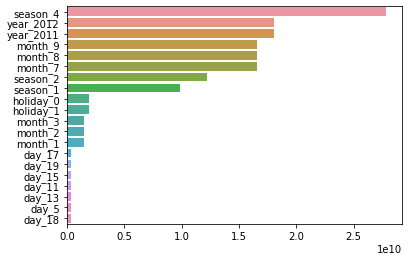

In [ ]:
coef = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

위 그래프 처럼 나오면 안되는데 왜이러는지 모르겠뉍..

회귀 트리를 이용해 회귀 예측을 할 것이다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators = 500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
  # XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환
  get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

### RandomForestRegressor ###
RMSLE:0.355, RMSE:50.454, MAE:31.256
### GradientBoostingRegressor ###
RMSLE:0.330, RMSE:53.335, MAE:32.745
[00:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE:0.345, RMSE:58.245, MAE:35.768
### LGBMRegressor ###
RMSLE:0.319, RMSE:47.215, MAE:29.029


앞의 선형 회귀 모델보다 회귀 예측 성능이 개선됐다. 하지만 이것이 회귀 트리가 선형 회귀보다 더 나은 성능을 가진다는 의미는 아니다.

<br>

###**10. 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법**
####**데이터 사전 처리(Preprocessing)**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('/content/drive/MyDrive/Jupyter/house_price.csv')
house_df = house_df_org.copy()
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print('데이터 세트의 Shape: ', house_df.shape)
print('\n전체 피처의 type \n', house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 칼럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape:  (1460, 81)

전체 피처의 type 
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수:
  PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


Null 값이 너무 많은 피처는 드롭하고 회귀 모델 적용 전 타깃 분포도가 정규 분포인지 확인할 것이다.

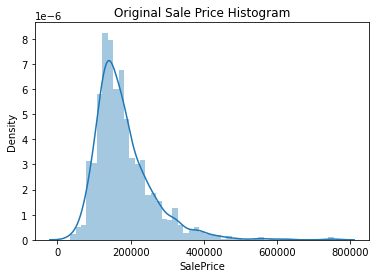

In [ ]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

정규분포가 아닌 한쪽으로 왜곡된 형태임을 확인할 수 있으므로 로그 변환을 통해 정규 분포 형태로 만들어 줄 것이다.

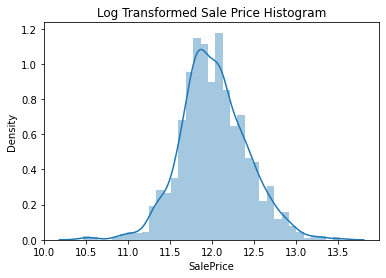

In [ ]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

로그 변환을 통해 정규 분포 형태로 변환됨을 확인할 수 있다.<br> 
이제 Null값이 많은 PoolQC, MiscFeature, Alley, Fence, FireplaceQu는 삭제하고 Id도 단순 식별자이므로 삭제, LotFrontage는 Null이 비교적 많으나 평균값으로 대체할 것이다. 나머지 Null 피처는 Null 값이 많지 않으므로 숫자형의 경우 평균값으로 대체할 것이다.

In [ ]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace = True)

# 드롭하지 않는 숫자형 Null 값은 평균값으로 대체
# mean 메서드는 자동으로 숫자형 칼럼만 추출해 칼럼별 평균값을 Series 객체로 반환해줌
house_df.fillna(house_df.mean(), inplace = True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


이제 문자형 피처를 제외하고는 Null 값이 존재하지 않으므로 문자형 피처는 원-핫 인코딩으로 변환할 것이다.<br>
get_dummies() 함수는 문자열 피처를 원-핫 인코딩 변환하며 Null 값은 'None' 칼럼으로 대체해준다.

In [ ]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Sahpe:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Sahpe: (1460, 271)
## Null 피처의 Type :
 Series([], dtype: object)


<br> 
####**선형 회귀 모델 학습/예측/평가**
RMSLE(실제 값과 예측 값의 오류를 로그 변환한 뒤 RMSE를 적용)<br><br> 
위에서 **실제 값(SalePrice)에 로그 변환**을 취했고 이를 기반으로 예측 값을 구했으니 **예측 값 또한 로그 변환 값**이다. 따라서 **예측 결과 오류에 RMSE만 적용**하면 RMSLE가 구해지는 것이다.

In [ ]:
# 한 모델의 rmse값 반환
def get_rmse(model):
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)
  print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse, 3))
  return rmse

# 여러 모델의 rmse값 반환
def get_rmses(models):
  rmses = []
  for model in models:
    rmse = get_rmse(model)
    rmses.append(rmse)
  return rmses

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.176


[0.13189576579153628, 0.12750846334052995, 0.17628250556471403]

Lasso의 경우 다른 회귀 방식들보다 떨어지는 예측 성능을 보여 하이퍼 파라미터 튜닝이 필요해 보인다.<br><br> 
그보다 먼저 피처별 회귀 계수를 시각화해서 모델별로 어떠한 피처의 회귀 계수로 구성되는지 확인하기 위해 **회귀 계수 값의 상위 10개, 하위 10개의 피처명과 그 회귀 계수 값을 가지는 판다스 Series 객체를 반환**하는 함수를 만들 것이다.

In [ ]:
def get_top_bottom_coef(model, n=10):
  # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명
  coef = pd.Series(model.coef_, index = X_features.columns)

  # + 상위 10개, - 하위 10개의 회귀 계수를 추출해 반환
  coef_high = coef.sort_values(ascending = False).head(n)
  coef_low = coef.sort_values(ascending = False).tail(n)
  return coef_high, coef_low

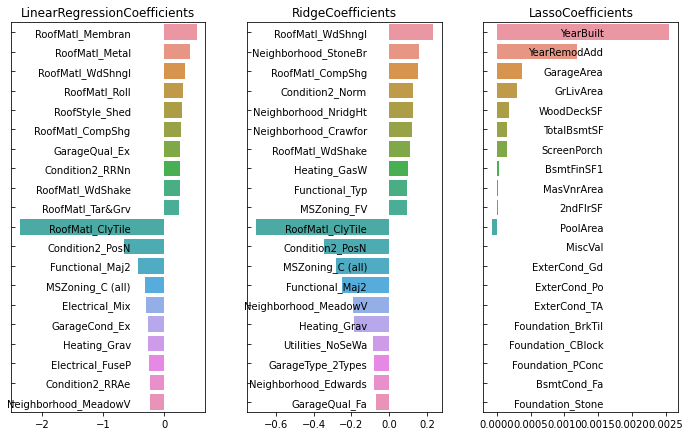

In [ ]:
def visualize_coefficient(models):

  # 3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
  fig, axs = plt.subplots(figsize = (10, 6), nrows = 1, ncols = 3)
  fig.tight_layout()

  # 입력 인자로 받은 list 객체인 models에서 차례로 model을 추출해 회귀 계수 시각화
  for i_num, model in enumerate(models):
    # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합
    coef_high, coef_low = get_top_bottom_coef(model)
    coef_concat = pd.concat([coef_high, coef_low])

    # ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정
    axs[i_num].set_title(model.__class__.__name__+'Coefficients', size = 12)
    axs[i_num].tick_params(axis='y', direction = 'in', pad = -120)
    for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
      label.set_fontsize(10)
    sns.barplot(x = coef_concat.values, y = coef_concat.index, ax = axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

OLS 기반의 LinearRegression과 Ridge의 경우 회귀 계수가 휴사한 형태를 보이는 반면 Lasso는 전체적으로 회귀 계수가 너무 작고 YearBuilt가 가장 크고 다른 피처의 회귀 계수는 너무 작다.<br> <br> 
학습 데이터의 데이터 분할에 문제가 있는 것인지 확인하기 위해 train_test_split 함수를 쓰지 않고 X_features와 y_target을 가지고 5개 교차 검증 폴드 세트로 분할해 평균 RMSE를 측정해볼 것이다.

In [ ]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
  for model in models:
    # 분할하지 않고 전체 데이터로 cross_val_score() 수행. 모델별 CV RMSE값과 평균 RMSE 값 출력
    rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring = 'neg_mean_squared_error', cv = 5))
    rmse_avg = np.mean(rmse_list)
    print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
    print('{0} CV 평균 RMSE 값 : {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE 값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값 : 0.155

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값 : 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값 : 0.198


여전히 Lasso가 다른 회귀 모델들에 비해 예측 성능이 떨어지는 것을 확인할 수 있다. 따라서 alpha 하이퍼 파라미터를 변화시키며 최적 값을 도출해 볼 것이다.

In [ ]:
from sklearn.model_selection import GridSearchCV

# 모델과 하이퍼파라미터 객체를 받아 최적화 작업의 결과 표시 함수 작성
def print_best_params(model, params):
  grid_model = GridSearchCV(model, param_grid = params, scoring = 'neg_mean_squared_error', cv = 5)
  grid_model.fit(X_train, y_train)
  rmse = np.sqrt(-1 * grid_model.best_score_)
  print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha : {2}'. format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))

ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_parmas = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_parmas)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1498, 최적 alpha : {'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1521, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.12


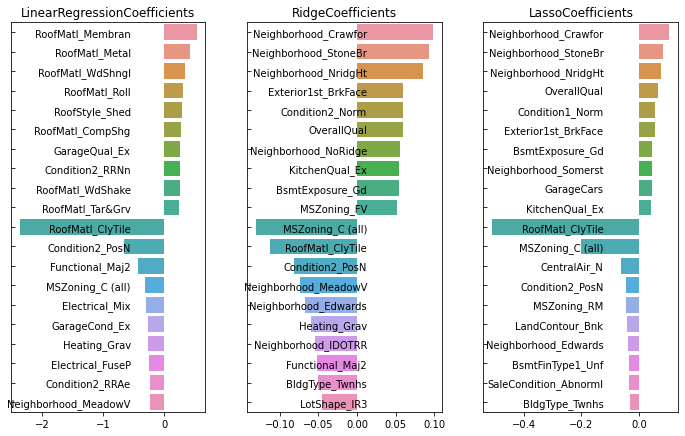

In [ ]:
# 앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 10)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

alpha 값 최적화 이후 예측 성능이 훨씬 좋아진 것을 확인할 수 있다. Lasso와 다른 회귀 계수들 간의 분포도도 비슷해졌지만 아직 Lasso의 회귀 계수값이 너무 작아 **피처 데이터 세트의 데이터 분포도를 확인하고 이상치 데이터 처리**를 통해 데이터를 추가적으로 가공해 볼 것이다.<br><br> 
첫부분에서 타깃 데이터 세트의 데이터 분포 왜곡을 확인했다. **피처 데이터 세트의 경우도 지나치게 왜곡된 피처 존재 시 회귀 예측 성능을 저하**시킬 수 있으므로 모든 숫자형 피처의 데이터 분포도를 확인해 어느 정도로 왜곡됐는지 알아볼 것이다.<br><br> 
skew() 함수를 이용해 칼럼의 데이터 세트의 왜곡된 정도를 추출할 것이다. 이때 **반환 값이 1이상인 경우 왜곡 정도가 높다고 판단 후 로그 변환**을 할 것이다. 여기서 주의할 점은 **skew()를 적용하는 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처는 제외**해야 한다.

In [ ]:
from scipy.stats import skew

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

# house_df에 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew() 호출
skew_features = house_df[features_index].apply(lambda x: skew(x))

# skew(왜곡) 정도가 1이상인 칼럼만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [ ]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [ ]:
feature_index2 = house_df.dtypes[house_df.dtypes != 'object'].index
skew_features2 = house_df[feature_index2].apply(lambda x : skew(x))
skew_features2_top = skew_features2[skew_features2 > 1]
print(skew_features2_top.sort_values(ascending=False))

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
dtype: float64


아직 1보다 큰 피처들이 있지만 더 이상 로그 변환을 하더라도 개선하기 어렵기에 그대로 유지한다. house_df의 피처를 일부 로그 변환했으므로 다시 원-핫 인코딩을 적용한 house_df_ohe를 만들고 이에 기반한 데이터 세트를 모두 다시 만든다.

In [ ]:
# 왜곡 정도가 높은 피처를 로그 변환했으므로 다시 원-핫 인코딩을 적용하고 피처/타깃 데이터 세트 생성
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size =0.2, random_state = 156)

# 피처를 로그 변환한 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1321, 최적 alpha : {'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1308, 최적 alpha : {'alpha': 0.001}


학습 데이터 피처의 로그 변환 전과 비교하면 평균 RMSE 값이 감소하여 예측 성능이 증가한 것을 알 수 있다.

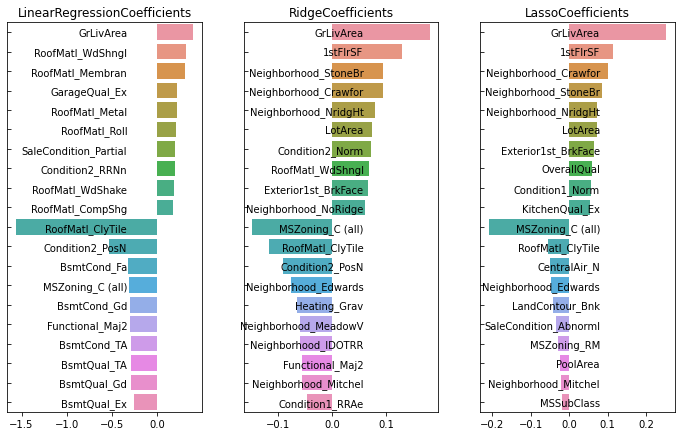

In [ ]:
# 최적 하이퍼파라미터를 넣어 예측
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 8)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

# 회귀 계수 값 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

주거 공간의 크기(GrLivArea)가 회귀 계수가 가장 높은 피처가 되어 주거 공간의 크기가 주택 가격에 미치는 영향이 제일 클 것이라는 결과가 도출되었다.<br><br> 
이제 이상치 데이터를 분석할 것이다. **회귀 계수가 높은 피처, 예측에 많은 영향을 미치는 중요 피처의 이상치 데이터 처리가 중요**하다.<br><br> 
주택 가격 데이터가 변환되기 이전의 원본 데이터 세트인 house_df_org에서 GrLivArea와 SalePrice의 관계를 시각화해 볼 것이다.

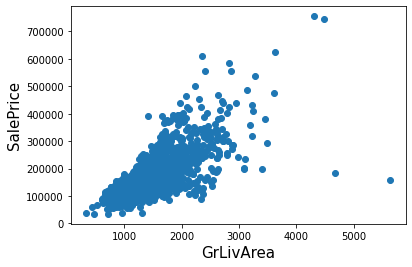

In [ ]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize = 15)
plt.xlabel('GrLivArea', fontsize = 15)
plt.show()

시각화를 통해 두 피처가 양의 상관관계를 띄고 있음을 알 수 있고 4000평이 넘는데 가격이 500000 보다 낮은 두 개의 이상치 데이터는 삭제할 것이다.<br><br> 
GrLivArea와 SalePrice 모두 로그 변환된 값이므로 이를 반영한 조건을 생성한 뒤, 불린 인덱싱으로 대상을 찾는다.

In [ ]:
# GrLivArea와 SalePrice 모두 로그 변환됐으므로 이를 반영한 조건 생성
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('이상치 레코드 index : ', outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape:', house_df_ohe.shape)

# DataFrame의 인덱스를 이용해 이상치 레코드 삭제
house_df_ohe.drop(outlier_index, axis = 0, inplace = True)
print('이상치 삭제 후 house_df_ohe shape: ', house_df_ohe.shape)

이상치 레코드 index :  [ 523 1298]
이상치 삭제 전 house_df_ohe shape: (1460, 271)
이상치 삭제 후 house_df_ohe shape:  (1458, 271)


In [ ]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

ridge_params = {'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1158, 최적 alpha : {'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1153, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.129
Ridge 로그 변환된 RMSE: 0.105
Lasso 로그 변환된 RMSE: 0.1


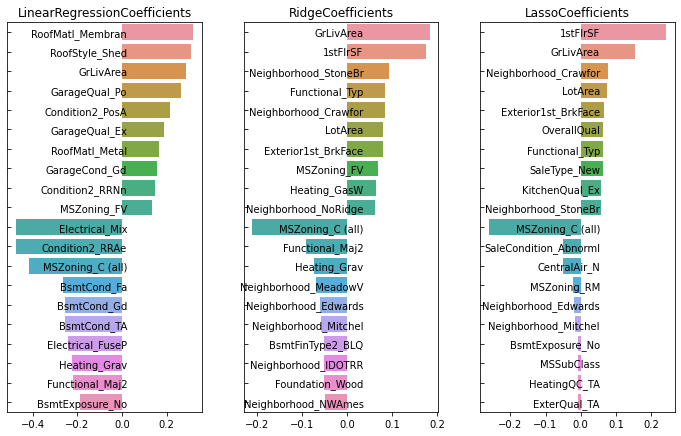

In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 5)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 rmse 값 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

<br> 
####**회귀 트리 모델 학습/예측/평가**

In [ ]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample = 0.8)
print_best_params(xgb_reg, xgb_params)

[02:35:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:35:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.12, 최적 alpha : {'n_estimators': 1000}


In [ ]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, num_leaves = 4, subsample = 0.6, colsample_bytree= 0.4, reg_lambda=10, n_jobs=-1)
print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1245, 최적 alpha : {'n_estimators': 1000}


<br> 
####**회귀 모델의 예측 결과 혼합을 통한 최종 예측**
A 모델과 B 모델, 두 모델의 예측값이 있다면 A 모델 예측값의 40%, B 모델 예측값의 60%를 더해서 최종 회귀 값으로 예측

In [ ]:
def get_rmse_pred(preds):
  for key in preds.keys():
    pred_value = preds[key]
    mse = mean_squared_error(y_test, pred_value)
    rmse = np.sqrt(mse)
    print('{0} 모델의 RMSE : {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha = 5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델의 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출 (Ridge 40%, Lasso 60%)
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

# 최종 혼합모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.10012346829152086
Ridge 모델의 RMSE : 0.10458039157878732
Lasso 모델의 RMSE : 0.10024170460890035


최종 혼합 모델의 RMSE가 개별 모델보다 성능 면에서 약간 개선 됐다. 이번에는 XGBoost와 LightGBM을 혼합할 것이다.

In [ ]:
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample = 0.8)
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, num_leaves = 4, subsample = 0.6, colsample_bytree = 0.4, reg_lambda = 10, n_jobs = -1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합':pred, 'XGBM':xgb_pred, 'LGBM':lgbm_pred}

get_rmse_pred(preds)

[02:58:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE : 0.09897715854093486
XGBM 모델의 RMSE : 0.10075115846547565
LGBM 모델의 RMSE : 0.1015065721553885


<br> 
####**스태킹 앙상블 모델을 통한 회귀 예측**

스태킹은 두 종류의 모델이 필요함. <br>첫 번째는 **개별적인 기반 모델**, 두 번째는 이 **개별 기반 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트 데이터 세트를 만드는 것**이다.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  
  # 지정된 n_folds값으로 KFold 생성
  kf = KFold(n_splits = n_folds, shuffle = True, random_state = 0)

  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__, 'model 시작')

  # KFold에서 (fold - 1)개는 train data, 1개는 validation data로 나눔
  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트:', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    X_te = X_train_n[valid_index]
    y_tr = y_train_n[train_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean



In [ ]:
# get_stacking_base_datasets()는 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base) 모델이 생성한 학습용/테스트용 데이터 반환
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
Lasso model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작
XGBRegressor model 시작
	 폴드 세트: 0 시작
[05:44:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트: 1 시작
[05:45:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트: 2 시작
[05:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트: 3 시작
[05:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트: 4 시작
[05:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor model 시작
	 폴드 세트: 0 시작
	 폴드 세트: 1 시작
	 폴드 세트: 2 시작
	 폴드 세트: 3 시작
	 폴드 세트: 4 시작


In [ ]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 스태킹 형태로 결합
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델 적용
meta_model_lasso = Lasso(alpha = 0.0005)

# 개별 모델 예측값을 기반으로 새롭게 만들어진 학습/테스트 데이터로 메타 모델 예측 및 RMSE 측정
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.09879119117674676


스태킹 회귀 모델이 현재까지 가장 좋은 성능 평가를 보여준다. 스태킹 모델은 분류 뿐 아니라 회귀에서 특히 효과적으로 사용될 수 있는 모델이다.